In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from catboost import Pool, cv
random_state = 7
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import os
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
def find_intersection(tr, ts, iterations, learning_rate,depth, no_genes=100):
       # get current directory
    path = os.getcwd()
    parent = os.path.dirname(path)

    train = pd.read_csv(parent + '\Data\\' + tr + ".csv")
    test = pd.read_csv(parent + '\Data\\' + ts + ".csv")
    
    X_train = train.drop("target", axis=1)
    y_train = train["target"]
    
    X_test  = test.drop("target", axis=1)
    y_test = test["target"]
    
        # initialize Pool
    train_pool = Pool(X_train, 
                      y_train)
        # initialize Pool
    test_pool = Pool(X_test, 
                      y_test)
    
    start_time = time.time()

    model = CatBoostClassifier(iterations=iterations,
                           depth=depth,
                           learning_rate=learning_rate,
                           loss_function='Logloss',
                           verbose=False)

    model.fit(train_pool)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    LossFunctionChange = CatBoostClassifier.get_feature_importance(model, type="LossFunctionChange",data=test_pool)
    ind_LossFunctionChange = np.argpartition(LossFunctionChange, -no_genes)[-no_genes:]
    df_loss_function = pd.DataFrame()
    df_loss_function["feature"] = list(X_train.columns)
    df_loss_function["importance"] = LossFunctionChange
    df_loss_function= df_loss_function.sort_values(by = "importance", ascending = False)
    
    PredictionValuesChange = CatBoostClassifier.get_feature_importance(model)
    ind_PredictionValuesChange = np.argpartition(PredictionValuesChange, -no_genes)[-no_genes:]
    
    df_pred_value = pd.DataFrame()
    df_pred_value["feature"] = list(X_train.columns)
    df_pred_value["importance"] = PredictionValuesChange
    df_pred_value = df_pred_value.sort_values(by = "importance", ascending = False)
    
    intersection = (X_train.columns[(np.intersect1d(ind_PredictionValuesChange, ind_LossFunctionChange))])
    return df_loss_function, df_pred_value, intersection
    

In [22]:
# tr = "trainset_AMLvsALL_90_target_in"
# ts = "testset_AMLvsALL_10_target_in"

tr = "trainset_ALLvsHealhy_80_target_in"
ts = "testset_ALLvsHealthy_20_target_in" 

no_genes = 75

# a,b,c = find_intersection(tr, ts, 200, 0.4, 4, no_genes )
a,b,c = find_intersection(tr, ts, 150, 0.1, 5, no_genes )

--- 111.49928045272827 seconds ---


In [23]:
print(c)
print(len(c))


Index(['SOX4', 'SCRN1', 'PRCP', 'TGFBI', 'TSPAN7', 'SYNE2', 'LY75-CD302',
       'MPO', 'SMARCD3', 'WASF1', 'MYL6B', 'MRC1', 'KIAA0513', 'MYB', 'JADE3',
       'LCK', 'CLDN10', 'BPI', 'MEOX1', 'EREG', 'RHAG', 'CSRP2', 'BTN1A1',
       'SPP1', 'FCER1A', 'ELN', 'PIK3CB', 'PFAS', 'ZNF423', 'IGHV5-51', 'ADA',
       'KIAA0930', 'SPG21', 'TPCN1', 'REXO4', 'ZBTB38', 'ARPP21', 'KLHL3',
       'ABHD2'],
      dtype='object')
39


In [24]:
import pickle
with open("genes_to_keep.pickle", "wb") as f:
    pickle.dump(c,f)
    

In [4]:
a

,feature,importance
9415,DHX32,0.001923
3097,CFD,0.001626
5263,CD24,0.001560
7613,CD3D,0.001460
2683,MYB,0.001057
...,...,...
3405,NRXN3,-0.000846
11292,BATF3,-0.000905
8128,ZNF423,-0.000946
12145,LEF1,-0.001266


In [5]:
b

,feature,importance
8128,ZNF423,11.514235
3097,CFD,11.375029
5603,PLAGL1,8.258013
5834,GATA2,3.495317
5046,HMHB1,2.925717
...,...,...
4316,EN2,0.000000
4317,ERN1,0.000000
4318,IAPP,0.000000
4319,TTTY14,0.000000


In [7]:
def show_imp(di,di0,k):
    %matplotlib inline 
    import matplotlib.pyplot as plt
    import shap
    dfi = di.head(k)
    # feats importance
    plt.rcParams["figure.figsize"] = (12,7)
    ax = dfi.plot('feature', 'importance', kind='bar', color='c')
    ax.set_title("Feature Importance of CatBoost", fontsize = 14)
    plt.show()
    print(". - .")
    print(" ")
    # feats importance LossFunctionChange
    dfi0 = di0.head(k)
    plt.rcParams["figure.figsize"] = (12,7)
    ax1 = dfi0.plot('feature', 'importance', kind='bar', color='m')
    ax1.set_title("Feature Importance of LossFunctionChange", fontsize = 14)

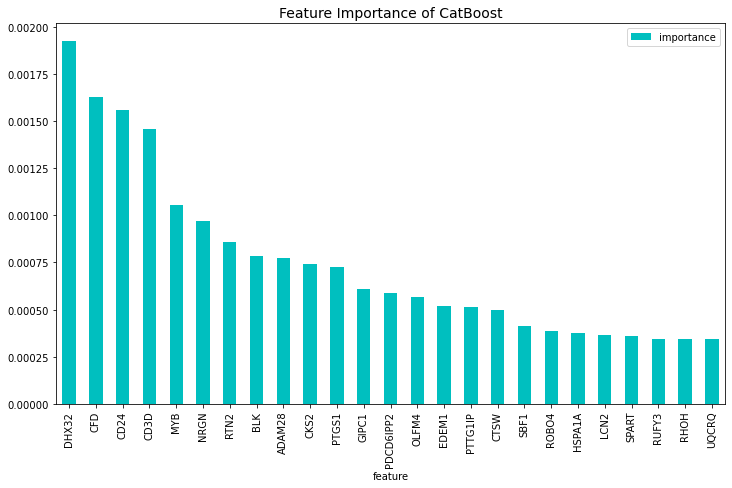

. - .
 


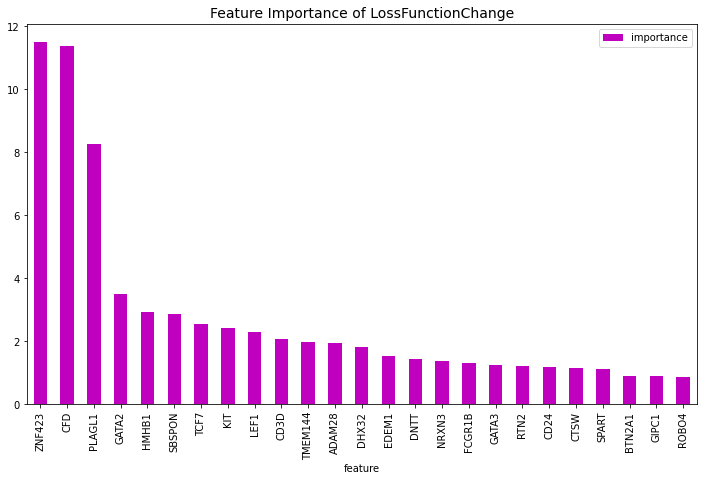

In [8]:
show_imp(a,b,no_genes)

In [9]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.
